In [15]:
import pandas as pd
import numpy as np
df = pd.read_csv('../raw_data/train.csv')

real_imgs = df[df.label == 0]
ai_imgs = df[df.label == 1]


In [84]:
# # pytorch data generator
# import torch
# from torch.utils.data import Dataset, DataLoader
# from torchvision import transforms, utils
# from PIL import Image
# import os
# from PIL import ImageEnhance

# class ImageDataset(Dataset):
#     """Image dataset."""

#     def __init__(self, csv_file, root_dir, transform=None):
#         """
#         Args: 
#             csv_file (string): Path to the csv file with annotations.
#             root_dir (string): Directory with all the images.
#             transform (callable, optional): Optional transform to be applied
#                 on a sample.
#         """
#         self.imgs_frame = pd.read_csv(csv_file)
#         self.root_dir = root_dir
#         self.transform = transform

#     def __len__(self):      
#         return len(self.imgs_frame)

#     def __getitem__(self, idx):
#         if torch.is_tensor(idx):
#             idx = idx.tolist()

#         img_name = os.path.join(self.root_dir,
#                                 self.imgs_frame.iloc[idx, 0])
#         image = Image.open(img_name)
#         label = self.imgs_frame.iloc[idx, 1]
#         sample = {'image': image, 'label': label}

#         if self.transform:
#             sample = self.transform(sample)

#         return sample

# # pytorch transforms    

# class ToTensor(object): 
#     """Convert ndarrays in sample to Tensors."""

#     def __call__(self, sample):
#         image, label = sample['image'], sample['label']

#         # swap color axis because
#         # numpy image: H x W x C
#         # torch image: C X H X W
#         image = image.transpose((2, 0, 1))
#         return {'image': torch.from_numpy(image),
#                 'label': torch.tensor(label)}  

# class Normalize(object):
#     """Normalize image to zero mean and unit variance."""

#     def __call__(self, sample):
#         image, label = sample['image'], sample['label']
#         image = image.float()
#         image = image / 255.0
#         return {'image': image,
#                 'label': label}

# class Resize(object):
#     """Resize image to 64x64."""

#     def __call__(self, sample):
#         image, label = sample['image'], sample['label']
#         image = image.resize((64, 64), Image.ANTIALIAS)
#         return {'image': image,
#                 'label': label}

# class RandomCrop(object):   
#     """Crop randomly the image in a sample."""

#     def __call__(self, sample):
#         image, label = sample['image'], sample['label']
#         w, h = image.size
#         new_w, new_h = 64, 64
#         left = np.random.randint(0, w - new_w)
#         top = np.random.randint(0, h - new_h)
#         image = image.crop((left, top, left + new_w, top + new_h))
#         return {'image': image,
#                 'label': label}

# class RandomHorizontalFlip(object): 
#     """Horizontally flip the given image randomly with a probability of 0.5."""

#     def __call__(self, sample):
#         image, label = sample['image'], sample['label']
#         if np.random.random() < 0.5:
#             image = image.transpose(Image.FLIP_LEFT_RIGHT)
#         return {'image': image,
#                 'label': label}

# class RandomVerticalFlip(object):
#     """Vertically flip the given image randomly with a probability of 0.5."""

#     def __call__(self, sample):
#         image, label = sample['image'], sample['label']
#         if np.random.random() < 0.5:
#             image = image.transpose(Image.FLIP_TOP_BOTTOM)
#         return {'image': image,
#                 'label': label}

# class RandomRotation(object):
#     """Rotate the image by angle."""

#     def __call__(self, sample):
#         image, label = sample['image'], sample['label']
#         angle = np.random.randint(-30, 30)
#         image = image.rotate(angle)
#         return {'image': image,
#                 'label': label}

# class RandomBrightness(object):
#     """Adjust brightness of an image."""

#     def __call__(self, sample):
#         image, label = sample['image'], sample['label']
#         factor = np.random.uniform(0.5, 1.5)
#         enhancer = ImageEnhance.Brightness(image)
#         image = enhancer.enhance(factor)
#         return {'image': image,
#                 'label': label}

# class RandomContrast(object):
#     """Adjust contrast of an image."""

#     def __call__(self, sample):
#         image, label = sample['image'], sample['label']
#         factor = np.random.uniform(0.5, 1.5)
#         enhancer = ImageEnhance.Contrast(image)
#         image = enhancer.enhance(factor)
#         return {'image': image,
#                 'label': label}


In [93]:
import os
import torch
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset

class ImageDataset(Dataset):
    def __init__(self, root_dir, csv_file, transform=None):
        """
        Args: 
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.root_dir = root_dir
        self.labels = pd.read_csv(csv_file)
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.labels.iloc[idx, 0])
        image = Image.open(img_name)

        if self.transform:
            image = self.transform(image)

        label = self.labels.iloc[idx, 1]

        return image, label

label:  1 size:  torch.Size([3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


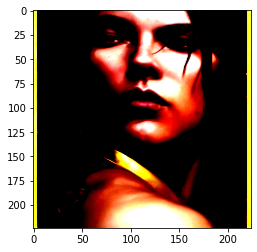

label:  1 size:  torch.Size([3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


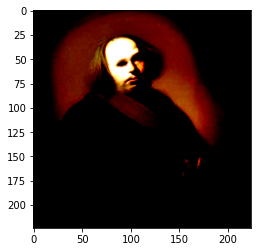

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


label:  1 size:  torch.Size([3, 224, 224])


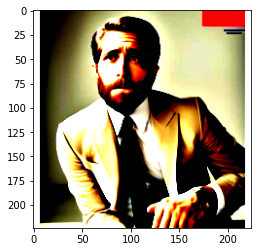

label:  0 size:  torch.Size([3, 224, 224])


In [102]:
# sample from dataset with transforms
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

# Define the transformations
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transformed_dataset = ImageDataset(csv_file='../raw_data/train.csv',
                                      root_dir='../raw_data/train',
                                      transform = transform)

                                    #   , 
                                    #     transform=transforms.Compose([
                                    #         Resize(),
                                    #         RandomCrop(),
                                    #         RandomHorizontalFlip(),
                                    #         RandomVerticalFlip(),
                                    #         RandomRotation(),
                                    #         RandomBrightness(),
                                    #         RandomContrast(),
                                    #         Normalize(),
                                    #         ToTensor()
                                    #     ])

for i in range(len(transformed_dataset)):
    sample = transformed_dataset[i]

    print("label: ", sample[1], 
          "size: ", sample[0].size())

    if i == 3:
        break

    # show sample
    plt.imshow(sample[0].permute(1, 2, 0))
    plt.show()



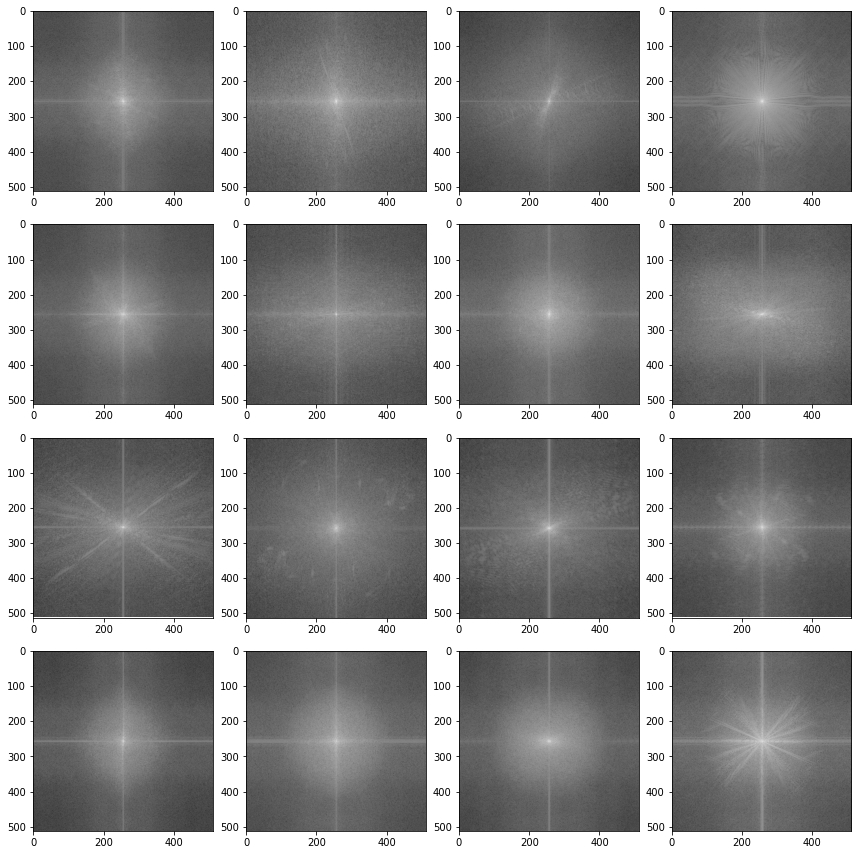

In [37]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for img_path, ax in zip(list(real_imgs['id'])[16:], axes.flat):
    img = Image.open(f'../raw_data/train/{img_path}')
    # image_grey = rgb2gray(img)
    image_channel =np.array(img)[:, :, 0]
    image_grey_fourier = np.fft.fftshift(np.fft.fft2(image_channel))
    log_img = np.log(abs(image_grey_fourier))
    ax.imshow(log_img, cmap='gray')

plt.tight_layout()
plt.savefig('../results/fft_real_imgs.png', facecolor='white')

In [43]:
log_img.shape[0] / 2

256.0

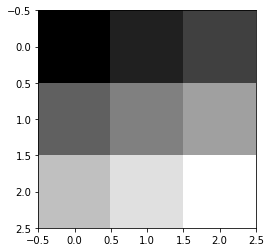

In [51]:
plt.imshow(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), cmap='gray')

In [63]:

freq_list = []
freq_label = []

for idx, img_path in enumerate(list(df.sample(5_000)['id'])):
    img = Image.open(f'../raw_data/train/{img_path}')

    # axes[idx, 0].imshow(img)
    # image_grey = rgb2gray(img)
    image_channel =np.array(img)[:, :, 0]
    image_grey_fourier = np.fft.fftshift(np.fft.fft2(image_channel))
    log_img = np.log(abs(image_grey_fourier))

    # create array of radii
    x,y = np.meshgrid(np.arange(log_img.shape[1]),np.arange(log_img.shape[0]))

    # R = np.sqrt(x**2+y**2) # if you want the origin at 0, 0

    x0, y0 = 256, 256

    R = np.sqrt((x-x0)**2+(y-y0)**2)

    # calculate the mean
    f = lambda r : log_img[(R >= r-.5) & (R < r+.5)].mean()
    r  = np.linspace(1,256,num=256)
    mean = np.vectorize(f)(r)

    freq_list.append(mean)
    freq_label.append(df.iloc[idx]['label'])

freq_list = np.array(freq_list)
freq_list.shape

/var/folders/_n/rrz6mzy13l71h2mg878ykrv80000gn/T/ipykernel_97007/2738487982.py:11: RuntimeWarning: divide by zero encountered in log
  log_img = np.log(abs(image_grey_fourier))


(5000, 256)

In [64]:
from sklearn.decomposition import PCA
proj = PCA(3).fit_transform(freq_list)

In [73]:
import umap
from sklearn.preprocessing import StandardScaler

scaled_freq_list = StandardScaler().fit_transform(freq_list)

reducer = umap.UMAP(n_components=3)
embedding = reducer.fit_transform(scaled_freq_list)
embedding.shape


(5000, 3)

In [74]:
import plotly.express as px
fig = px.scatter_3d(embedding, x=0, y=1, z=2, color=freq_label)
fig

In [77]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter = 1000).fit(freq_list, freq_label)

log_reg

LogisticRegression(max_iter=1000)

In [78]:
log_reg.score(freq_list, freq_label)

0.6012

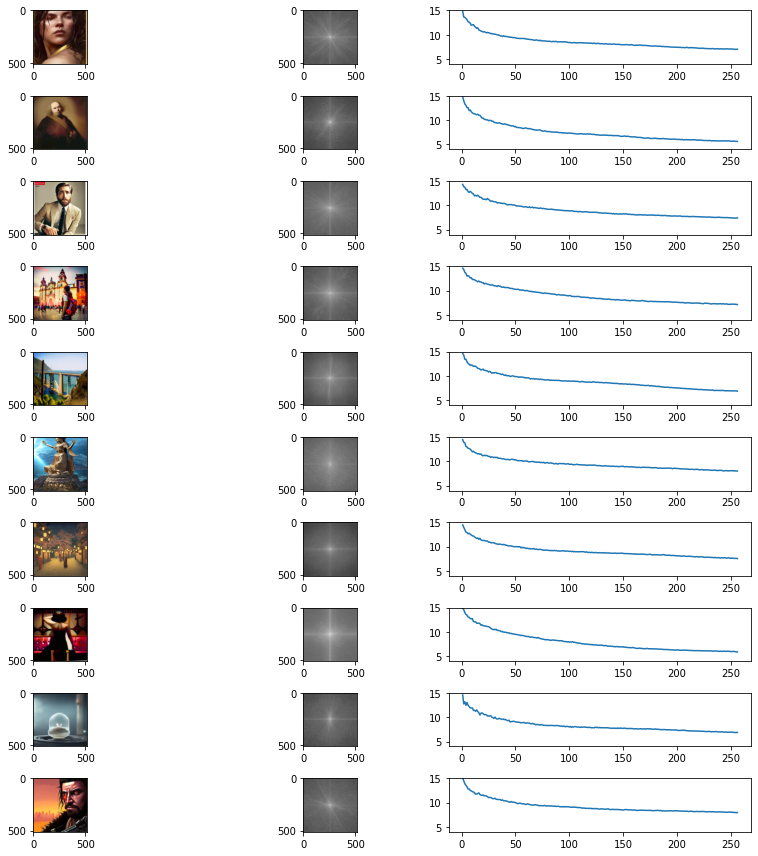

In [56]:
num_rows = 10
fig, axes = plt.subplots(num_rows, 3, figsize=(12, 12))

for idx, img_path in enumerate(list(ai_imgs['id'])[:num_rows]):
    img = Image.open(f'../raw_data/train/{img_path}')

    axes[idx, 0].imshow(img)
    # image_grey = rgb2gray(img)
    image_channel =np.array(img)[:, :, 0]
    image_grey_fourier = np.fft.fftshift(np.fft.fft2(image_channel))
    log_img = np.log(abs(image_grey_fourier))
    axes[idx, 1].imshow(log_img, cmap='gray')
    # create array of radii
    x,y = np.meshgrid(np.arange(log_img.shape[1]),np.arange(log_img.shape[0]))

    # R = np.sqrt(x**2+y**2) # if you want the origin at 0, 0

    x0, y0 = 256, 256

    R = np.sqrt((x-x0)**2+(y-y0)**2)

    # calculate the mean
    f = lambda r : log_img[(R >= r-.5) & (R < r+.5)].mean()
    r  = np.linspace(1,256,num=256)
    mean = np.vectorize(f)(r)

    axes[idx, 2].plot(r,mean)
    axes[idx, 2].set_ylim(4, 15)

plt.tight_layout()
plt.savefig('../results/fft_radialavg_ai_imgs.png', facecolor='white')

In [35]:
log_img

array([[4.89034913, 5.49013414, 5.35396864, ..., 5.34382902, 5.35396864,
        5.49013414],
       [5.08206547, 5.75955682, 5.44421857, ..., 5.0242667 , 5.59309754,
        5.07366857],
       [4.8249132 , 4.19468474, 5.46328714, ..., 4.7178667 , 4.27989098,
        4.75281265],
       ...,
       [4.46018025, 5.32625105, 4.74156182, ..., 4.79209143, 5.76482287,
        5.43479361],
       [4.8249132 , 4.75281265, 4.27989098, ..., 4.27633785, 5.46328714,
        4.19468474],
       [5.08206547, 5.07366857, 5.59309754, ..., 5.4229525 , 5.44421857,
        5.75955682]])

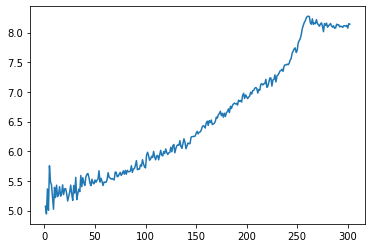

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# get some image
# image = data.coins()
# image = image[:,0:303]


plt.show()

In [ ]:
# to do
# compress fft output, radial or remove half if symmertrical
# how to classify?
# UMAP and visualise?
# autoencoder and visualise?
# make images/fft smaller


In [79]:
def fourier_transform_rgb(image):
    f_size = 25
    transformed_channels = []
    for i in range(3):
        rgb_fft = np.fft.fftshift(np.fft.fft2((image[:, :, i])))
        # rgb_fft[:225, 235:237] = 1
        # rgb_fft[-225:,235:237] = 1
        transformed_channels.append(rgb_fft)
    
    final_image = np.dstack([transformed_channels[0].astype(int), 
                             transformed_channels[1].astype(int), 
                             transformed_channels[2].astype(int)])
    
    fig, ax = plt.subplots(1, 2, figsize=(17,12))
    ax[0].imshow(image)
    ax[0].set_title('Original Image', fontsize = f_size)
    ax[0].set_axis_off()
    
    ax[1].imshow(final_image)
    ax[1].set_title('Transformed Image', fontsize = f_size)
    ax[1].set_axis_off()
    
    fig.tight_layout()

/var/folders/_n/rrz6mzy13l71h2mg878ykrv80000gn/T/ipykernel_97007/3812432568.py:10: ComplexWarning:

Casting complex values to real discards the imaginary part

/var/folders/_n/rrz6mzy13l71h2mg878ykrv80000gn/T/ipykernel_97007/3812432568.py:11: ComplexWarning:

Casting complex values to real discards the imaginary part

/var/folders/_n/rrz6mzy13l71h2mg878ykrv80000gn/T/ipykernel_97007/3812432568.py:12: ComplexWarning:

Casting complex values to real discards the imaginary part

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


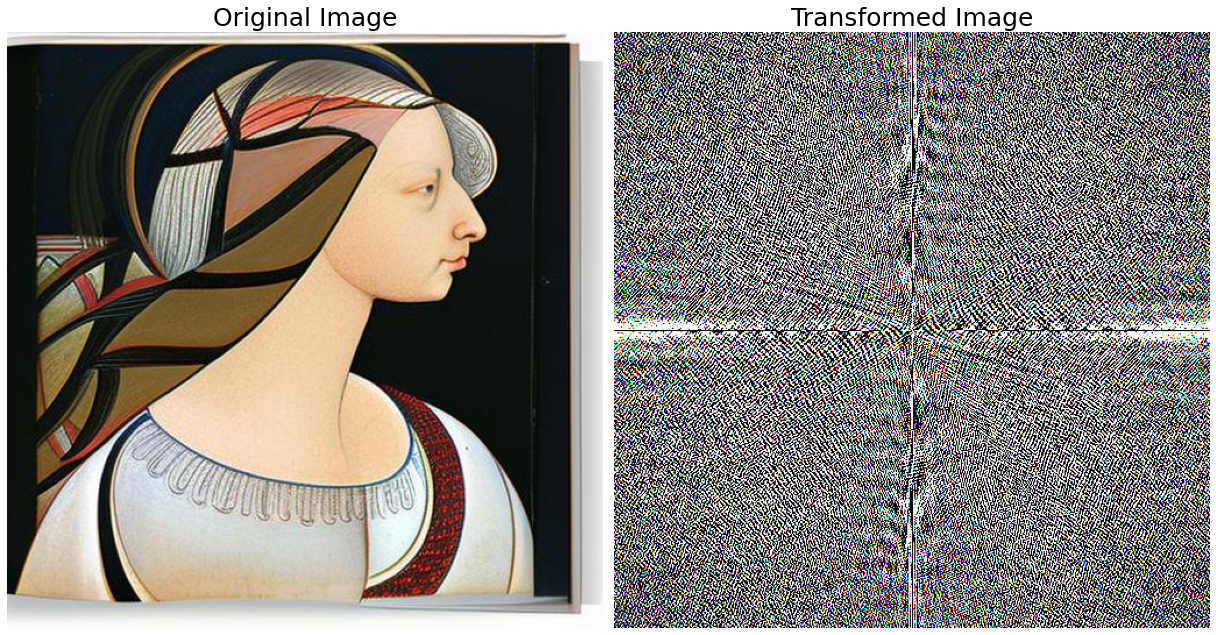

In [81]:
fourier_transform_rgb(np.array(img))

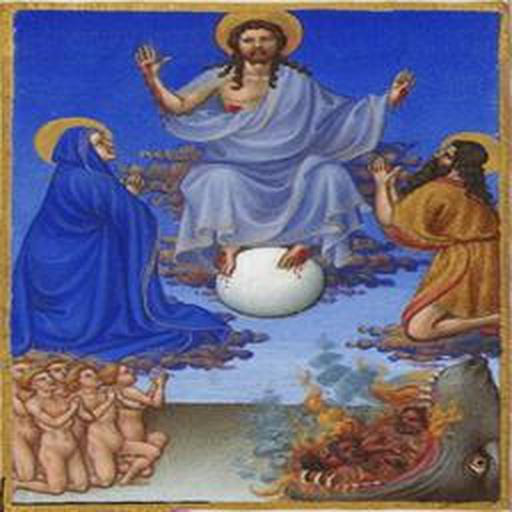

In [7]:
from PIL import Image
img = Image.open('../raw_data/train/0.jpg')
img
real_img = Image.open('../raw_data/train/3.jpg')
real_img

In [13]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist

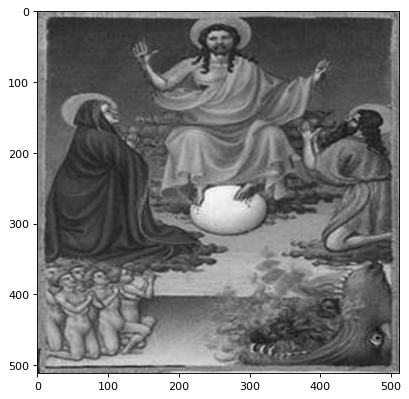

In [10]:
dark_image_grey = rgb2gray(real_img)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(dark_image_grey, cmap='gray')

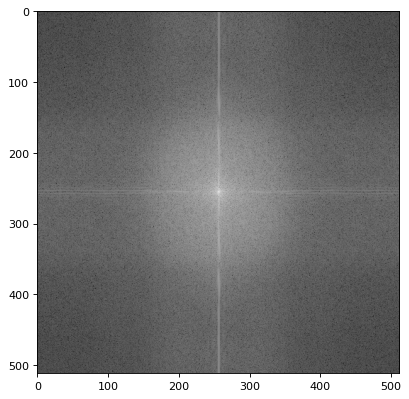

In [11]:
dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(dark_image_grey))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray');